In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:

# Load models
lstm_model = tf.keras.models.load_model('best_lstm_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

In [9]:
# Load data (update this part with your dataset)
X = np.load(r"P:\Project\train\X_train.npy")
y = np.load(r"P:\Project\train\y_train.npy")

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
y_train.shape

(4285,)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

LSTM Model Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.42      0.98      0.59        49
           2       0.64      0.72      0.68       504
           3       0.74      0.56      0.64       510

    accuracy                           0.66      1072
   macro avg       0.68      0.81      0.71      1072
weighted avg       0.68      0.66      0.66      1072



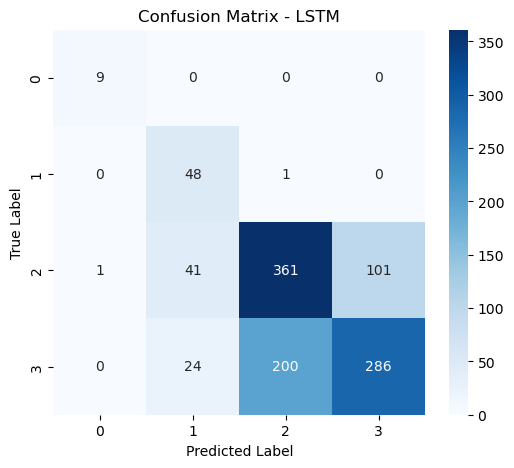


GRU Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.96      0.94        49
           2       0.73      0.62      0.67       504
           3       0.68      0.78      0.72       510

    accuracy                           0.71      1072
   macro avg       0.83      0.84      0.83      1072
weighted avg       0.72      0.71      0.71      1072



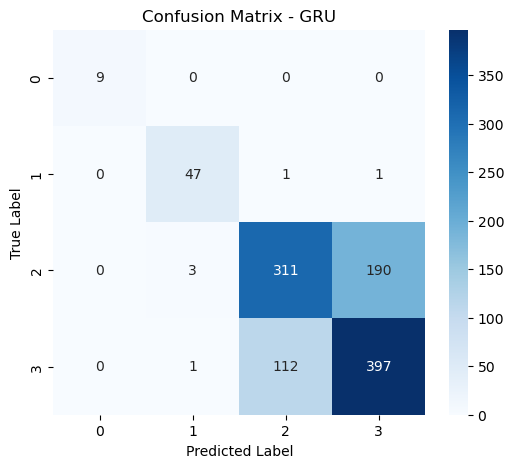

In [15]:
lstm_preds = lstm_model.predict(X_test)
gru_preds = gru_model.predict(X_test)

# Convert probabilities to class labels
lstm_preds = np.argmax(lstm_preds, axis=1)
gru_preds = np.argmax(gru_preds, axis=1)

# Convert y_test to class labels (only if one-hot encoded)
if len(y_test.shape) > 1:  # Check if y_test is one-hot encoded
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test  # If already labels, use directly

# Ensure data types are integers
y_true = y_true.astype(int)
lstm_preds = lstm_preds.astype(int)
gru_preds = gru_preds.astype(int)

# Function to evaluate model performance
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate both models
evaluate_model("LSTM", y_true, lstm_preds)
evaluate_model("GRU", y_true, gru_preds)

# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.show()